# Анализ данных по COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv("data/covid_19_data.csv")
data_1.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
data_1.shape

(306429, 8)

In [4]:
data_1.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
data_2 = data_1.drop(['SNo', 'Last Update'], axis=1)
data_2.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


In [6]:
# проверка на дубликаты
data_2.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()

5

In [7]:
# удаление дубликатов
data_2 = data_2.drop_duplicates(['ObservationDate', 'Province/State', 'Country/Region'])

In [8]:
# проверка на дубликаты
data_2.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()

0

In [9]:
data_2["Country/Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [10]:
# очищаем названия стран от лишних символов
data_2.loc[:, "Country/Region"] = data_2["Country/Region"].str.strip(" (),''")#.unique()

In [11]:
# изучаем страну "Others"
data_2[data_2["Country/Region"] == "Others"]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1039,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1113,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [12]:
data_2.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [13]:
data_2["ObservationDate"].head()

0    01/22/2020
1    01/22/2020
2    01/22/2020
3    01/22/2020
4    01/22/2020
Name: ObservationDate, dtype: object

In [14]:
pd.to_datetime("01/22/2020").date()

datetime.date(2020, 1, 22)

In [15]:
# конвертация временных данных в тип TimeStamp
data_2.loc[:, "ObservationDate"] = pd.to_datetime(data_2["ObservationDate"])

In [16]:
data_2["ObservationDate"].head()

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: ObservationDate, dtype: datetime64[ns]

In [17]:
# пример пар - функции, похожего на apply
my_list = [10, 20, 30, 40]

my_func = lambda x: x * 10

list(map(my_func, my_list))

[100, 200, 300, 400]

In [18]:
# извлечение дат из TimeStamp
data_2.loc[:, "ObservationDate"] = data_2.loc[:, "ObservationDate"].apply(lambda el: el.date())
data_2["ObservationDate"].head()                                              

0    2020-01-22
1    2020-01-22
2    2020-01-22
3    2020-01-22
4    2020-01-22
Name: ObservationDate, dtype: object

In [19]:
# Анализ

# группируем данные по датам и выводи суммарные значения (по всему миру)
world_data = data_2.groupby(["ObservationDate"]).sum()
world_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [20]:
data_2.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [21]:
# группируем данные по странам и датам
country_data = data_2.groupby(["Country/Region", "ObservationDate"]).sum()
country_data.head()

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
               2020-02-28             1.0     0.0        0.0

In [22]:
# данные максимумов по странам
max_data = country_data.groupby(["Country/Region"]).max()
max_data.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0


In [23]:
# сортировка датафрейма по определенному столбцу
# например, по заболевшим
max_data.sort_values(by="Confirmed", ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
India,27894800.0,325972.0,25454320.0
Brazil,16471600.0,461057.0,14496224.0
France,5978650.0,109518.0,390878.0
Turkey,5235978.0,47271.0,5094279.0
Russia,4995613.0,118781.0,4616422.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Argentina,3732263.0,77108.0,3288467.0


In [24]:
# визуализация данных

In [25]:
world_data.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,82.0,65.0
2020-01-28,5578.0,131.0,108.0
2020-01-29,6165.0,133.0,127.0
2020-01-30,8235.0,171.0,145.0


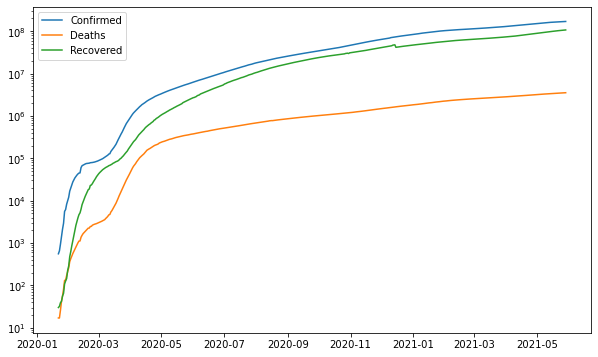

In [30]:
plt.figure(figsize=[10, 6])

plt.yscale("log")

plt.plot(world_data.index, world_data["Confirmed"], label="Confirmed")
plt.plot(world_data.index, world_data["Deaths"], label="Deaths")
plt.plot(world_data.index, world_data["Recovered"], label="Recovered")

plt.legend()

plt.show()

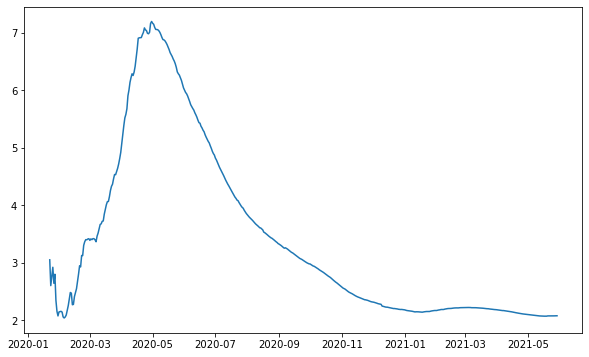

In [31]:
# оценка текущей летальности

plt.figure(figsize=[10, 6])

letal_array = (world_data["Deaths"]/ world_data["Confirmed"]) * 100

plt.plot(world_data.index, letal_array)

plt.show()

In [32]:
# новые случаи заболевания

# функция для вычисления новых случаев
def new_cases_calculate(df, col_key):
    new_cases = []
    for index in range(df.shape[0]):
        if index == 0:
            new_cases.append(df[col_key][index])
        else:
            new_cases.append(df[col_key][index]) - (df[col_key][index-1])
    return new_cases      

In [39]:
def decorator(func):
    def wrapper(*args):
        plt.figure(figsize=[10,6])
        
        func(args[0], args[1], label=args[2])
        
        plt.legend()
        
        plt.show()
        
    return wrapper

In [46]:
nc = new_cases_calculate(world_data, "Confirmed")

plt.figure(figsize=[10,6])

plt.plot(world_data.index, nc, label="Новые случаи")

plt.legend()

plt.show()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [42]:
data_2.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [50]:
rus_data = data_2[data_2["Country/Region"] == "Russia"].reset_index()
rus_data = rus_data.drop("index", axis=1)
rus_data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-31,NaN,Russia,2.0,0.0,0.0
1,2020-02-01,NaN,Russia,2.0,0.0,0.0
2,2020-02-02,NaN,Russia,2.0,0.0,0.0
3,2020-02-03,NaN,Russia,2.0,0.0,0.0
4,2020-02-04,NaN,Russia,2.0,0.0,0.0


In [51]:
rus_data["Province/State"].unique()

array([nan, 'Adygea Republic', 'Altai Krai', 'Altai Republic',
       'Amur Oblast', 'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Bashkortostan Republic', 'Belgorod Oblast', 'Bryansk Oblast',
       'Buryatia Republic', 'Chechen Republic', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Chuvashia Republic',
       'Dagestan Republic', 'Ingushetia Republic', 'Irkutsk Oblast',
       'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic',
       'Kemerovo Oblast', 'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Mordovia Republic', 'Moscow', 'Moscow 

In [52]:
ykt_data = rus_data[rus_data["Province/State"] == "Sakha (Yakutiya) Republic"].reset_index()
ykt_data.head()

,index,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,182,2020-06-01,Sakha (Yakutiya) Republic,Russia,2042.0,8.0,903.0
1,265,2020-06-02,Sakha (Yakutiya) Republic,Russia,2116.0,8.0,943.0
2,348,2020-06-03,Sakha (Yakutiya) Republic,Russia,2214.0,9.0,1015.0
3,431,2020-06-04,Sakha (Yakutiya) Republic,Russia,2308.0,11.0,1071.0
4,514,2020-06-05,Sakha (Yakutiya) Republic,Russia,2380.0,14.0,1177.0


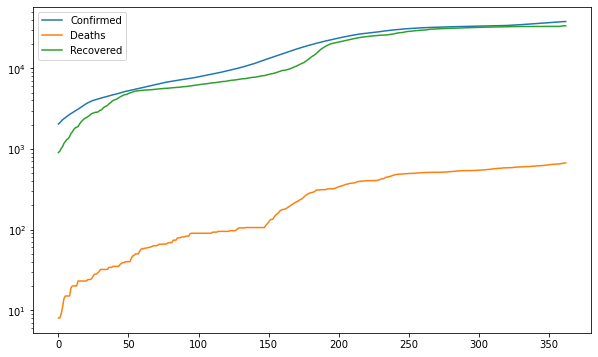

In [53]:
plt.figure(figsize=[10, 6])

plt.yscale("log")

plt.plot(ykt_data.index, ykt_data["Confirmed"], label="Confirmed")
plt.plot(ykt_data.index, ykt_data["Deaths"], label="Deaths")
plt.plot(ykt_data.index, ykt_data["Recovered"], label="Recovered")

plt.legend()

plt.show()

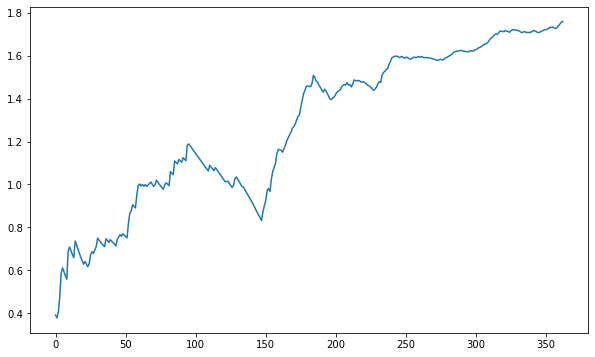

In [54]:
plt.figure(figsize=[10, 6])

letal_array = (ykt_data["Deaths"]/ ykt_data["Confirmed"]) * 100

plt.plot(ykt_data.index, letal_array)

plt.show()

In [57]:
nc = new_cases_calculate(ykt_data, "Confirmed")

plt.figure(figsize=[10,6])

plt.plot(ykt_data["ObservationDate"].index, nc, label="Новые случаи")

plt.legend()

plt.show()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'